In [1]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import norm

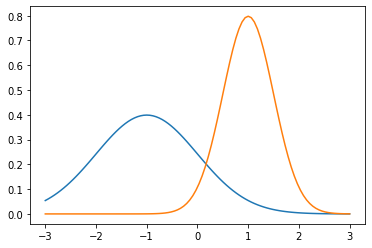

In [35]:
x = np.linspace(-3, 3, 100)

a = norm(-1, 1)
b = norm(1, 0.5)

plt.plot(x, a.pdf(x))
plt.plot(x, b.pdf(x))
plt.show()


# Fit a simple normal

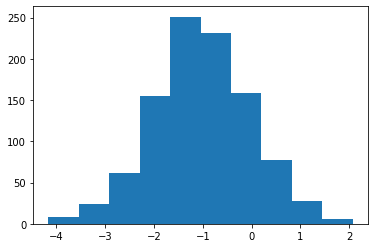

In [44]:
y = a.rvs(1000)

plt.hist(y);

In [49]:
with pm.Model() as model_a:
    sigma = pm.HalfNormal("sigma", sigma=10)
    mu = pm.Normal("mu", mu=0, sigma=5)
    
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)
    
    trace = pm.sample(3000, cores=2)

/home/wolle/.cache/pypoetry/virtualenvs/pymc-cZghDz_T-py3.8/lib/python3.8/site-packages/pymc3/sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [mu, sigma]


Sampling 2 chains for 1_000 tune and 3_000 draw iterations (2_000 + 6_000 draws total) took 5 seconds.


[-1.08823161 -0.96785543]


/home/wolle/.cache/pypoetry/virtualenvs/pymc-cZghDz_T-py3.8/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
<ipython-input-54-79503a48cfe9>:8: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


<Figure size 504x504 with 0 Axes>

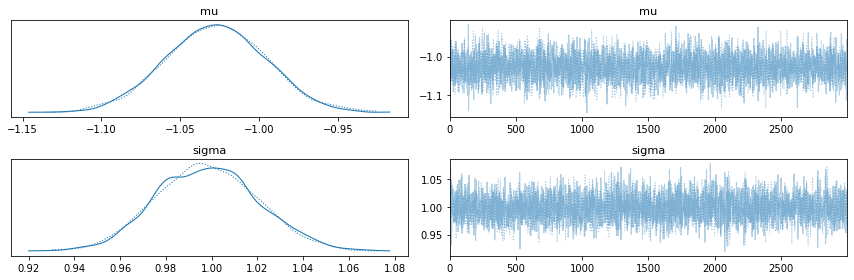

In [54]:
from arviz import plot_trace
from arviz.stats import hdi

print(hdi(trace[mu], alpha=.95))

plt.figure(figsize=(7, 7))
plot_trace(trace)
plt.tight_layout()

plt.show()

# Fit mixture

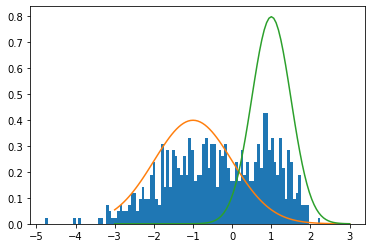

In [57]:
y2 = list(a.rvs(400)) + list(b.rvs(200))

plt.hist(y2, bins=100, density=True)
plt.plot(x, a.pdf(x))
plt.plot(x, b.pdf(x))
plt.show()

In [59]:
with pm.Model() as model:
    theta = pm.Uniform("theta", lower=0, upper=1)
    sigma_a = pm.HalfNormal("sigma_a", sigma=10)
    sigma_b = pm.HalfNormal("sigma_b", sigma=10)
    mu_a = pm.Normal("mu_a", sigma=10)
    mu_b = pm.Normal("mu_b", sigma=10)
    
    choice = pm.Bernoulli("choice", p=theta)
    
    # TODO: Use Mixture model